In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = "/Users/joancaceres/Library/Mobile Documents/com~apple~CloudDocs/Magnetometer 2024-08-26 18-03-49/Raw Data.csv"

In [4]:
data = pd.read_csv(data_path)

In [13]:
data.head()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,0.002738,27.715057,-23.725878,5.053822,36.831818
1,0.012715,27.764824,-23.665884,4.838806,36.801815
2,0.022692,27.781628,-23.573957,4.694180,36.736707
3,0.032669,27.809937,-23.365366,4.606297,36.613534
4,0.042646,27.748981,-23.474073,4.691143,36.647577


In [10]:
data_np = data.to_numpy()

array([2.73787500e-03, 1.27148750e-02, 2.26918750e-02, ...,
       1.25545451e+04, 1.25545551e+04, 1.25545651e+04])

In [29]:
time = data_np[:,0]
time_interval = np.diff(time).mean()
N = len(time)
Bfield = data_np[:,-1]
fft_B = np.abs(np.fft.fft(Bfield)) / N
freqs = np.fft.fftfreq(N, d=time_interval)

indices_positivos = freqs >= 0
freqs_positivas = freqs[indices_positivos]
magnitud_positiva = fft_B[indices_positivos]

In [35]:
Bfield

0.009977994660831727

In [45]:
def moving_average(arr, window_size):
    kernel = np.ones(window_size) / window_size
    return np.convolve(arr, kernel, mode='same')


smoothed_Bfield= moving_average(Bfield, window_size=1000)

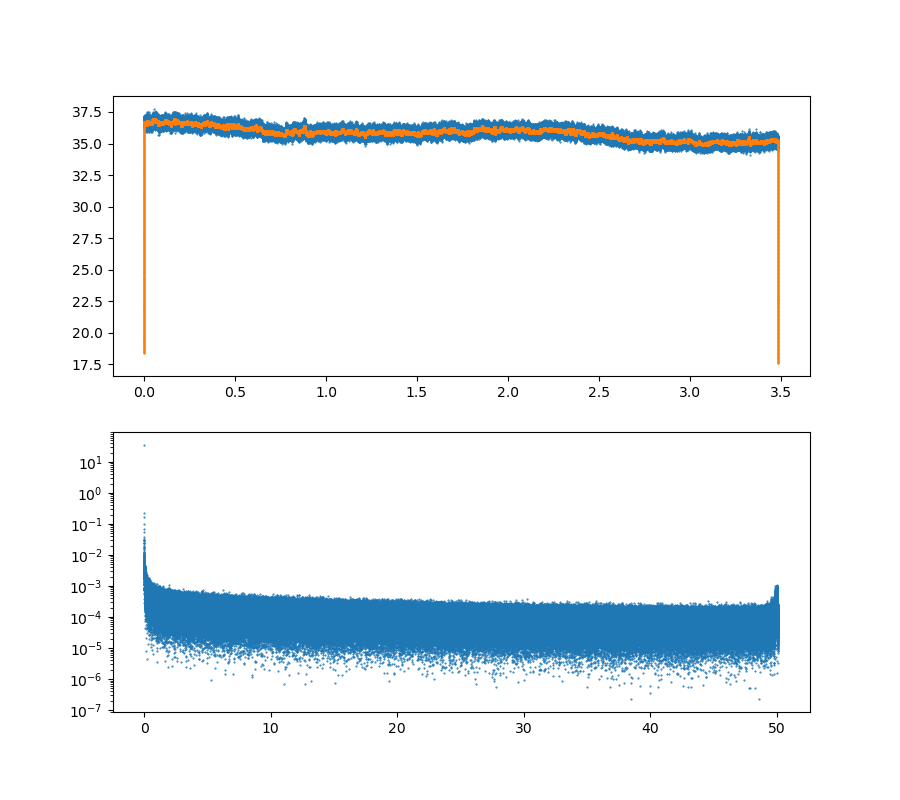

In [48]:
%matplotlib widget
fig,ax = plt.subplots(2,1, figsize=(9,8))
ax[0].plot(time/3600,Bfield,'.',markersize=1)
ax[0].plot(time[1:-1]/3600,smoothed_Bfield[1:-1],'.',markersize=1)
ax[1].plot(freqs_positivas, magnitud_positiva,'.',markersize=1)
ax[1].set_yscale('log')
plt.show()